# Examples

In [1]:
import beautifulplots as bp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Barplot

Data:Product Category Sales by Store


,category,sales,store,units
0,groceries,90,Store-A,18.0
1,groceries,60,Store-B,12.0
2,groceries,50,Store-C,10.0
3,hardware,50,Store-A,5.0
4,hardware,30,Store-B,3.0
5,hardware,20,Store-C,2.0
6,hobbies,40,Store-A,2.0
7,hobbies,40,Store-B,2.0
8,hobbies,20,Store-C,1.0


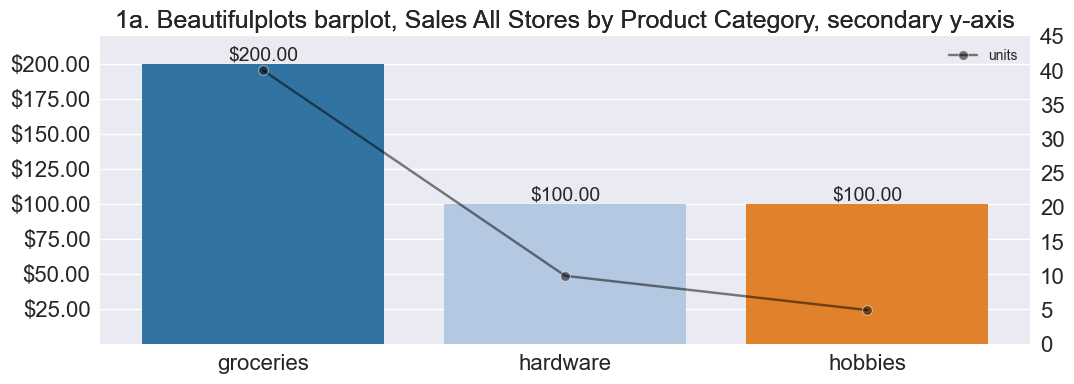

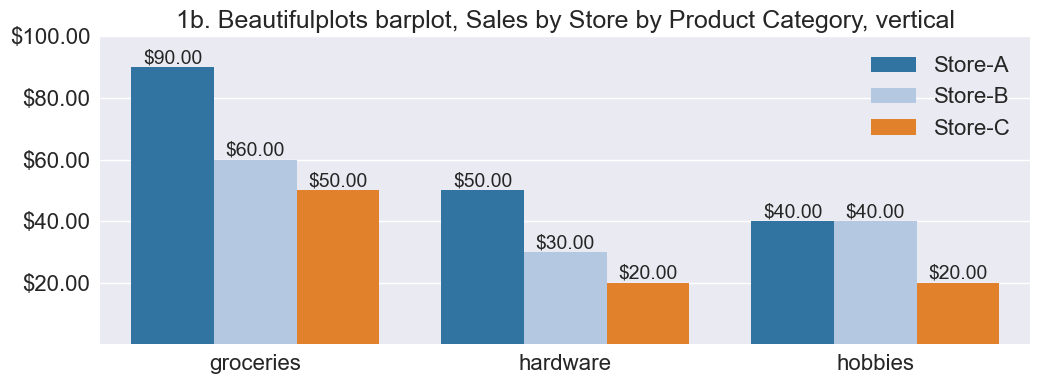

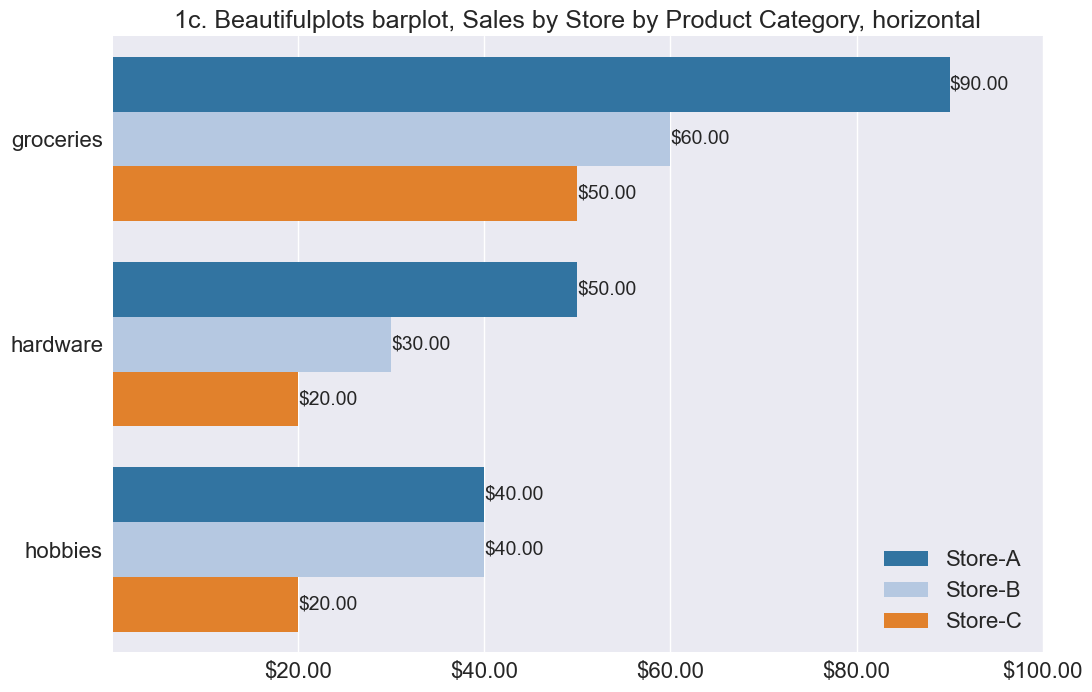

In [5]:
# Create a DataFrame with the needed information

# reset plot defaults for these examples
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

# data 
print('Data:Product Category Sales by Store')
barplot_data = { 'category':['groceries','groceries','groceries', 'hardware','hardware','hardware','hobbies','hobbies','hobbies'] ,
                'sales':[ 90, 60,50, 50,30,20,40,40,20], 'store':['Store-A','Store-B','Store-C','Store-A','Store-B','Store-C','Store-A','Store-B','Store-C'] }

df = pd.DataFrame(barplot_data)
# unit sales by category ... assume some average sale price per category
def unit_sales(row):
    units = 0
    if row['category'] == 'groceries': units = row['sales']/5
    elif row['category'] == 'hardware': units = row['sales']/10
    elif row['category'] == 'hobbies': units = row['sales']/20
    return units
df['units']= df.apply(lambda row: unit_sales(row),axis=1)
display(df)



# Plots

# Example 1a
bp.barplot(df,'category','sales', palette='tab20', 
                   title='1a. Beautifulplots barplot, Sales All Stores by Product Category, secondary y-axis', figsize=(12,4),
                   bardatalabels=True, bardataformat=".2f", barcurrency=True, ylims = (0.1,220), 
                   y2='units',ylims2=(0,45), color2='black',marker2="o")

# Example 1b
bp.barplot(df,'category','sales',hue='store', palette='tab20', 
                   title='1b. Beautifulplots barplot, Sales by Store by Product Category, vertical', figsize=(12,4), legend=True,
                   bardatalabels=True, bardataformat=".2f", barcurrency=True, ylims = (0.1,100))

# Example 1c
bp.barplot(df,'category','sales',hue='store', palette='tab20', 
                   title='1c. Beautifulplots barplot, Sales by Store by Product Category, horizontal', figsize=(12,8), 
                   bardatalabels=True, bardataformat=".2f", barcurrency=True, bar_orientation='h',
                   xlims = (0.1,100), legend=True, legendloc="lower right")







## Lineplot, Stock Market S&P 500

,Close,High,Low,Open,Volume,Adj Close
Date,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000.0,NaN
1950-01-04,16.85,16.85,16.85,16.85,1890000.0,NaN
1950-01-05,16.93,16.93,16.93,16.93,2550000.0,NaN
1950-01-06,16.98,16.98,16.98,16.98,2010000.0,NaN
1950-01-09,17.08,17.08,17.08,17.08,2520000.0,NaN


Pandas lineplot


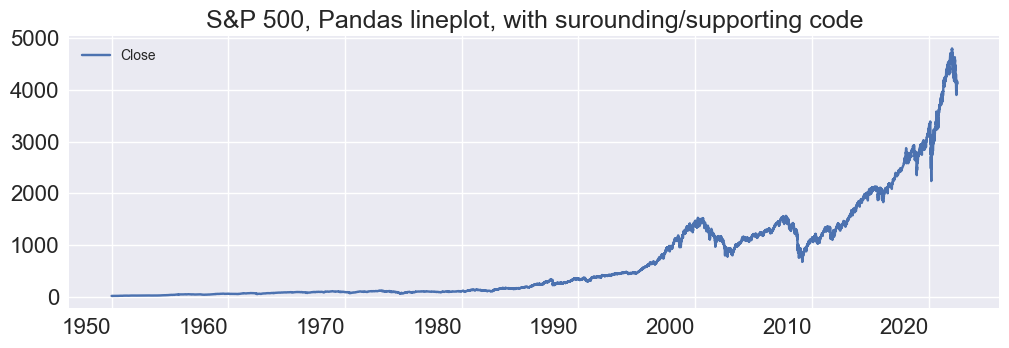

,Date,Close,High,Low,Open,Volume,Adj Close
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1.260000e+06,NaN
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1.890000e+06,NaN
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2.550000e+06,NaN
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2.010000e+06,NaN
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2.520000e+06,NaN
...,...,...,...,...,...,...,...
18158,2022-06-02,4176.819824,4177.509766,4074.370117,4095.409912,3.604930e+09,4176.819824
18159,2022-06-03,4108.540039,4142.669922,4098.669922,4137.569824,3.107080e+09,4108.540039
18160,2022-06-06,4121.430176,4168.779785,4109.180176,4134.720215,3.852050e+09,4121.430176
18161,2022-06-07,4160.680176,4164.859863,4080.189941,4096.470215,3.476470e+09,4160.680176


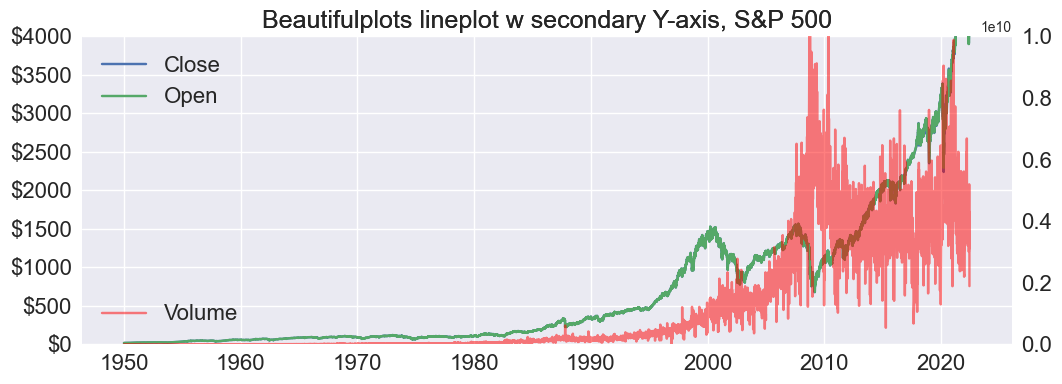

In [7]:

# reset plot defaults for these examples
import matplotlib as mpl
import datetime as dt
mpl.rcParams.update(mpl.rcParamsDefault) # reset plot/figure parameters

# Data
sp500_file =  '../data/GSPC_1950-1-3_to_2022-6-8.csv'
df_sp500 = pd.read_csv(sp500_file,index_col=0,parse_dates=True)
display(df_sp500.head())

# Pandas Plot ... use beutifulplots plot_defualts and set_axisparams for improving pandas graph 
print('Pandas lineplot')
plt.style.use('seaborn')
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(12,4))
plot_options = bp.plot_defaults()
plot_options['title']="S&P 500, Pandas lineplot, with surounding/supporting code"
g=df_sp500.plot(y='Close',ax=ax)  # note, it handles date index well
bp.set_axisparams(plot_options,ax,g)
plt.show()

# reset index ...  Seaborn and thus beautifulpltos requires x-axis to be a column 
df = df_sp500.reset_index() 
display(df)


# mph lineplot
bp.lineplot(df,x='Date' , y=['Close','Open'], y2='Volume', 
             ylims=(0,4000), ylims2=(0,10*1e9), legend_loc2 = "lower left", color2='red',
             figsize=[12,4],yaxis_currency=True, legend=True,
             ytick_format=".0f", title="Beautifulplots lineplot w secondary Y-axis, S&P 500")



# help - plot_defaults, barplot, lineplot

## help plot_defaults

In [10]:
help(bp.plot_defaults)

Help on function plot_defaults in module beautifulplots:

plot_defaults()
    Dictionary of matplotlib parameters. Each matplotlib parameter coresponds to a key with a corresponding value. 
    See also get_plot_options for extracting plot options from **kwargs. 
    
    **Axis - x, y, and plot area parameters**
    
    Args:
        df (DataFrame): The input DataFrame containing colums corresponding to bar_plot values (bar_values) and bar_plot columns (bar_columns).
    
        title (String): corresponds to the axis title. default = ''
            
        titlefontsize: font size of the axis title, default = 18
            
        legend_loc(String): Matplotlib legend location, for example, upper right , default = best.
        
        legend_loc2 (String): Secondary axis legend location, for example, upper right , default = best.
         
        xlims: (xmin, xmax), minimum and maximum x-values of the axis. default = None, in which case the min and max are set automatically 

## help barplot

In [6]:
help(bp.barplot)

Help on function barplot in module kale:

barplot(df, bar_columns, bar_values, y2=None, ax=None, test_mode=False, **kwargs)
    Bar plot function designed for ease of use and aesthetics, based on the Seaborn barplot function. 
    
    Args:
        df (DataFrame): The input DataFrame containing colums corresponding to bar_plot values ("bar_values") and column names (see examples in documentation)
            
        bar_columns: Datafrae columns corresponding to bar column names
            
        bar_values: Dataframe column corresponding to bar column values
            
        ax (axis): matplotlib axis (optional), default = None. If axis is None, then create a matplolib figure, axis to host the barplot
            
        color: Matplotlib compatabile color name as text or RGB values, for example,  color = [51/235,125/235,183/235].
            
        palette: Matplotlib compatible color palette name, for example, "tab20"
            
        hue: Name of hue dimension varia

## help lineplot

In [11]:
help(bp.lineplot)

Help on function lineplot in module beautifulplots:

lineplot(df, x, y, y2=None, ax=None, test_mode=False, **kwargs)
    Lineplot function designed for ease of use and aesthetics. Based on the
    Seaborn lineplot function.
    
    Args:
        df (Dataframe): The input DataFrame containing colums corresponding to x and y     
            
        x: Dataframe column corresponding to the lineplot x-axis
            aldfsd;lfj
        
        y: Dataframe column corresponding to the lineplot y-axis
            
        y2: Column name correspondng to the secondary axis, default = None 
    
    Returns:
        returns None if processing completes succesfully (without errors).

